TAREA: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Area: 4683.5, Perímetro: 259.1787134408951, Circularidad: 0.876156584621355, Relación perimetro circulo: 1.038164384285511
Area: 5941.0, Perímetro: 289.9066330194473, Circularidad: 0.8882866031677314, Relación perimetro circulo: 1.038381729088303
Area: 3250.0, Perímetro: 214.9949473142624, Circularidad: 0.8835613661008722, Relación perimetro circulo: 1.0320409276248084
Area: 7532.5, Perímetro: 325.462984085083, Circularidad: 0.8936054323666972, Relación perimetro circulo: 1.0333636230566121


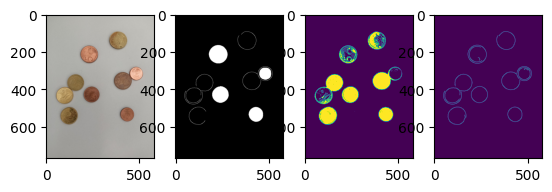

In [80]:
img = cv2.imread('./Assets/RandomScattered.jpg')
if img.shape[1] > 800:
    factor_reduccion = img.shape[1]//500
    img = cv2.resize(img, (img.shape[1]//factor_reduccion,img.shape[0]//factor_reduccion))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

umbral = 200

th1,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
th2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

img_median_blur = cv2.medianBlur(img_gris, 7)
img_gaussian_blur = cv2.GaussianBlur(img_gris, (9, 9), 3)

canny_output = cv2.Canny(img_gaussian_blur, 0, 85)

contornos2, hierarchy2 = cv2.findContours(canny_output, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contornos2, -1, (0,255,0), 3)

img_blur = cv2.medianBlur(img_gris, 7)

img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)
#Recorre los contornos externos
for c in contornos2:
    #Área del contorno
    area = cv2.contourArea(c)
    #Área mínima (útil filtrar en ocasiones)
    if area > 10:
        #Perímetro del contorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        
        #cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)
        #print(f'Area: {area}, Perímetro: {perimetro}, Circularidad: {circularidad}, Relación perimetro circulo: {relacion_perimetro_circulo}')
            

        circularidad = 4*np.pi*area/(perimetro*perimetro)
        relacion_perimetro_circulo = perimetro/(2*np.pi*radio)

        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

        if  0.5 < circularidad < 1.1 and 1 < relacion_perimetro_circulo < 1.5:
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)
            print(f'Area: {area}, Perímetro: {perimetro}, Circularidad: {circularidad}, Relación perimetro circulo: {relacion_perimetro_circulo}')

#Hough
"""
# Convertir la imagen de contornos a escala de grises para usar con HoughCircles
img_cont_gris = cv2.cvtColor(img_cont, cv2.COLOR_RGB2GRAY)

# Aplicar un desenfoque a img_cont_gris para reducir ruido
img_cont_blur = cv2.GaussianBlur(img_cont_gris, (9, 9), 3)

img_blur = cv2.medianBlur(img_gris, 7)

circles = cv2.HoughCircles(
    img_blur, 
    cv2.HOUGH_GRADIENT, 
    dp=2, 
    minDist=30, 
    param1=70, 
    param2=80, 
    minRadius=0, 
    maxRadius=150
)

#Dibuja sobre entrada e imagen vacía
img_test = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circles[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_test,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

            if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        print(i)
        center = (i[0], i[1])
        # Dibujar el círculo externo
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    
"""

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)

plt.subplot(1, 4, 2)
plt.imshow(img_cont)    

plt.subplot(1, 4, 3)
plt.imshow(img_th2)

plt.subplot(1, 4, 4)
plt.imshow(canny_output)


windowName = "amor"

cv2.namedWindow(windowName)
def on_mouse(event, x, y, flags, userdata):
    if event == cv2.EVENT_LBUTTONDOWN and isCoin(x,y, img_cont):
        print(f'Mouse position: ({x}, {y})')

def isCoin(x, y, img):
    return (0 != np.sum(img[y,x]))
cv2.setMouseCallback(windowName, on_mouse)

cv2.imshow(windowName,img_rgb)
while cv2.waitKey(20) != 27:
    dummy = 0    
     # Se detiene hasta pulsar tecla (>0 milisegundos)
cv2.destroyAllWindows() # Destruye todas las ventanas